[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PyGIS222/Fall2019/blob/master/LessonM44_numpy.ipynb)

## Notebook Lesson 4.4

# NumPy

This Jupyter Notebook is part of module 4 of the course GIS222 (Fall2019). Carefully study the content of this Notebook and use the chance to reflect the material through the interactive examples.

### Sources
This notebook is an adapted version of the [NumPy components of Lessons 5 of the Geo-Python 2018](https://geo-python.github.io/site/2018/lessons/L5/numpy.html), which is licensed under a Creative Commons Attribution-ShareAlike 4.0 International licence. 

---


# A. Exploring Data with NumPy

This lesson discusses [**NumPy**](http://www.numpy.org/), an important and sophisticated Python module to read, explore and process data files. 

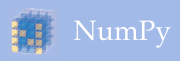

Reading data files using NumPy will make life a bit easier compared to the traditional Python way of reading data files.
If you're curious about that, you can check out some of the lesson materials from past years about [reading data in the Pythonic way](https://geo-python.github.io/2017/lessons/L5/reading-data-from-file.html).

## What is NumPy?
NumPy is a library for Python designed for efficient scientific (numerical) computing.
It is an essential library in Python that is used under the hood in many other modules (including [Matplotlib](https://matplotlib.org/) and [Pandas](https://pandas.pydata.org/)).
Here, you will get a sense of a few things NumPy can do.

## Reading a data file with NumPy

### Importing NumPy

Now we're ready to read in our temperature data file.
First, we need to import the NumPy module.

In [3]:
import numpy as np

That's it!
NumPy is now ready to use.
Notice that we have imported the NumPy module with the name `np`.

### Reading a data file

Now we'll read the file data into a variable called `data`.
We can start by defining the location (filepath) of the data file in the variable `fp`. In this case, the file is located in a subdirectory of this notebook's (`assignments_M4`) folder: `./data/`. Hence, the combined file path and name are:

In [4]:
fp = './data/Kumpula-June-2016-w-metadata.txt'

Now we can read the file using the NumPy `genfromtxt()` function.

In [5]:
data = np.genfromtxt(fp)

`np.genfromtxt()` is a general function for reading data files separated by commas, spaces, or other common separators.
For a full list of parameters for this function, please refer to the [NumPy documentation for numpy.genfromtxt()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html).

Here we use the function simply by giving the filename as an input parameter.
If all goes as planned, you should now have a new variable defined as `data` in memory that contains the contents of the data file.
You can check the the contents of this variable by typing the following:

In [6]:
print(data)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]


### Inspecting our data file

Hmm...something doesn't look right here.
You were perhaps expecting some temperature data, right?
Instead we have only a list of `nan` values.

`nan` stands for "not a number", and might indicate some problem with reading in the contents of the file.
Looks like we need to investigate this further.

We can begin our investigation by opening the data file in the JupyterHub file browser: simply click on the `Kumpula-June-2016-w-metadata.txt` data file. For that, you have to click on data folder in the current assignment folder, then click on the file.

<img src="./img/M44_findDataFile.png" title="Finding the datafile Kumpula-June-2016-w-metadata.txt in the directory assignments_M4b/data on the JupyterHub." width="500" />

Figure 1: *Finding the datafile Kumpula-June-2016-w-metadata.txt in the directory assignments_M4b/data on the JupyterHub.*

You should see something like the following:

We can observe a few important things:

- There are some metadata at the top of the file (a *header*) that provide basic information about its contents and source.
  This isn’t data we want to process, so we need to skip over that part of the file when we load it.
    - We can skip the top header lines in the file using the `skip_header` parameter.
- The values in the data file are separated by commas.
    - We can specify the value separator using the `delimiter` parameter.
- The top row of values below the header contains names of the column variables.
    - We'll deal with those later.

### Reading our data file, round 2

Let's try reading again with this information in mind.

In [7]:
data = np.genfromtxt(fp, skip_header=9, delimiter=',')

Note that we now skip the header lines (first 9 lines) using `skip_header=9` and tell NumPy the files is comma-separated using `delimiter=','`.

Let's print out the contents of `data` now and see how things look.

In [8]:
print(data)

[[2.0160601e+07 6.5500000e+01 7.3600000e+01 5.4700000e+01]
 [2.0160602e+07 6.5800000e+01 8.0800000e+01 5.5000000e+01]
 [2.0160603e+07 6.8400000e+01 7.7900000e+01 5.5600000e+01]
 [2.0160604e+07 5.7500000e+01 7.0900000e+01 4.7300000e+01]
 [2.0160605e+07 5.1400000e+01 5.8300000e+01 4.3200000e+01]
 [2.0160606e+07 5.2200000e+01 5.9700000e+01 4.2800000e+01]
 [2.0160607e+07 5.6900000e+01 6.5100000e+01 4.5900000e+01]
 [2.0160608e+07 5.4200000e+01 6.0400000e+01 4.7500000e+01]
 [2.0160609e+07 4.9400000e+01 5.4100000e+01 4.5700000e+01]
 [2.0160610e+07 4.9500000e+01 5.5900000e+01 4.3000000e+01]
 [2.0160611e+07 5.4000000e+01 6.2100000e+01 4.1700000e+01]
 [2.0160612e+07 5.5400000e+01 6.4200000e+01 4.6000000e+01]
 [2.0160613e+07 5.8300000e+01 6.8200000e+01 4.7300000e+01]
 [2.0160614e+07 5.9700000e+01 6.7800000e+01 4.7800000e+01]
 [2.0160615e+07 6.3400000e+01 7.0300000e+01 4.9300000e+01]
 [2.0160616e+07 5.7800000e+01 6.7500000e+01 5.5600000e+01]
 [2.0160617e+07 6.0400000e+01 7.0700000e+01 5.5900000e+0

That's more like it.

OK, so let's review what just happened.
Well, the file content was read into a variable `data`, which is a type of NumPy *n*-dimensional structure used for storing data like a matrix.

What?!?

Yeah, in our case we have a two dimensional data struture similar to a spreadsheet. Everything is together in a single large data structure at the moment, but we'll see later in the lesson how to divide up our data and make interacting with it easier.

Now we can move on to exploring our data.

#### Checking data file formats

The example above, trying to read a datafile with some header text (the metadata in this case), is *very* common.
Reading data into NumPy is pretty easy, but it helps to have a sense of what the datafile looks like before you try to read it.
The challenge can be that large datafiles might not nicely (or quickly) load into the JupyterHub editor, so it might be better to look at only the top 5-10 lines of the file rather than loading the entire thing.
Fortunately, there are solutions to that problem.

When you're trying to think over how to read in a data file you can take advantage of common command-line tools like **head**.
**head** is a simple program to read lines from the start of a data file and print them to the screen.

You can use **head** from the terminal of the JupyterHub by first opening a JupyterHub terminal from the JupyterHub menu bar (**New** -> **Terminal**).
Once in the terminal, you can simply navigate to the directory containing your datafile (using the commands `pwd`, `cd <folder>` or `cd ..`). Once you are in the correct folder, type **head** followed by the file name:

```bash
$ head Kumpula-June-2016-w-metadata.txt
```

You will receive the following:

```bash
# Data file contents: Daily temperatures (mean, min, max) for Kumpula, Helsinki
#                     for June 1-30, 2016
# Data source: https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND
# Data processing: Extracted temperatures from raw data file, converted to
#                  comma-separated format
#
# David Whipp - 02.10.2017

YEARMODA,TEMP,MAX,MIN
20160601,65.5,73.6,54.7
```

As you can see, **head** gives you the first 10 lines of the file by default.
You can use the `-n` flag to get a larger or smaller number of lines.

```bash
$ head -n 3 Kumpula-June-2016-w-metadata.txt
```

This will print only the first three lines of the file:

```bash
# Data file contents: Daily temperatures (mean, min, max) for Kumpula, Helsinki
#                     for June 1-30, 2016
# Data source: https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND
```

## Exploring our dataset

So this is a big deal for us.
We now have some basic Python skills and the ability to read in data from a file for processing.
A normal first step when you load new data is to explore the dataset a bit to understand what is there and its format.

### Checking the data array's object type

Perhaps as a first step, we can check the object type of data we have in our NumPy array `data`.

In [7]:
type(data)

numpy.ndarray

NumPy arrays are of the object type *numpy.ndarray*. Yes, this is a completely new Python object type, specifically written for and unique to objects of the NumPy module. The NumPy *ndarray* is similar to Python lists, however, it should be understood more as data matrix, or more precise as an array of multiple dimensions. With that the arrays are specialized to process large and dense data sets. And they allows for easy implementation of sophisticated mathematical operations, including matrix operations.

The arrays have some significant difference from lists:

* The array elements explicitly allow multidimensionality,
* they make mathematical matrix operations possible,
* they are indexed by a tuple of nonnegative integers,
* the data type inside the array (e.g. precision of numbers, strings) can be defined, however,
* the data type is constrained to the same for all array elements.

As listed, the array elements are constrained to a specific data type, however, the entire array can consist of different *data types*. Let's see what that means.

### Checking the data array's data type

Let’s now have a look at the data types in our ndarray.
We can find this in the `dtype` attribute that is part of the ndarray data type, something that is known automatically for this kind of data.

In [8]:
print(data.dtype)

float64


Here we see the data are floating point values with 64-bit precision. Find an overview of all available ndarry object types at this page of the [NumPy User Guide](https://docs.scipy.org/doc/numpy/user/basics.types.html?highlight=object%20types).

<div class="alert alert-info">

**Note:**

There are some exceptions, but normal NumPy arrays will all have the same data type.

</div>

### Checking the size of the dataset

We can also check to see how many rows and columns we have in the dataset using the `shape` attribute.

In [9]:
print(data.shape)

(30, 4)


Here we see how there are 30 rows of data and 4 columns. Other attributes that can be requested are:

|NumPy Attribute | Content | Example |
| :-: | :- | :-: |
|ndim | number of dimensions | 2 |
|shape |size of each dimension |(2, 3) |  
|size |total size of the array |6 |
|dtype |data type of the array |float64 |
|itemsize |size in bytes |8 |
|nbytes |total size in bytes |(= size x itemsize)|32 |

### Working with our data - Index slicing

Let's have another quick look at our data.

In [10]:
print(data)

[[2.0160601e+07 6.5500000e+01 7.3600000e+01 5.4700000e+01]
 [2.0160602e+07 6.5800000e+01 8.0800000e+01 5.5000000e+01]
 [2.0160603e+07 6.8400000e+01 7.7900000e+01 5.5600000e+01]
 [2.0160604e+07 5.7500000e+01 7.0900000e+01 4.7300000e+01]
 [2.0160605e+07 5.1400000e+01 5.8300000e+01 4.3200000e+01]
 [2.0160606e+07 5.2200000e+01 5.9700000e+01 4.2800000e+01]
 [2.0160607e+07 5.6900000e+01 6.5100000e+01 4.5900000e+01]
 [2.0160608e+07 5.4200000e+01 6.0400000e+01 4.7500000e+01]
 [2.0160609e+07 4.9400000e+01 5.4100000e+01 4.5700000e+01]
 [2.0160610e+07 4.9500000e+01 5.5900000e+01 4.3000000e+01]
 [2.0160611e+07 5.4000000e+01 6.2100000e+01 4.1700000e+01]
 [2.0160612e+07 5.5400000e+01 6.4200000e+01 4.6000000e+01]
 [2.0160613e+07 5.8300000e+01 6.8200000e+01 4.7300000e+01]
 [2.0160614e+07 5.9700000e+01 6.7800000e+01 4.7800000e+01]
 [2.0160615e+07 6.3400000e+01 7.0300000e+01 4.9300000e+01]
 [2.0160616e+07 5.7800000e+01 6.7500000e+01 5.5600000e+01]
 [2.0160617e+07 6.0400000e+01 7.0700000e+01 5.5900000e+0

This is OK, but we can certainly make it easier to work with.
We can start by slicing our data up into different columns and creating new variables with the column data.
Slices from our array can be extracted using the *index values*.
In our case, we have two indices in our 2D data structure.
For example, the index values `[2,0]` ...

In [11]:
data[2, 0]

20160603.0

... give us the value at row 2, column 0.

We can also use ranges of rows and columns using the `:` character.
For example, we could get the first 5 rows of values in column zero by typing

In [12]:
data[0:5, 0]

array([20160601., 20160602., 20160603., 20160604., 20160605.])

Not bad, right?

In fact, we don't even necessarily need the lower bound for this slice of data because NumPy will assume it for us if we don't list it.
Let's see another example.

In [13]:
data[:5, 0]

array([20160601., 20160602., 20160603., 20160604., 20160605.])

Here, the lower bound of the index range `0` is assumed and we get all rows up to (but not including) index `5`.

### Slicing our data into columns

Now let's use the ideas of index slicing to cut our 2D data into 4 separate columns that will be easier to work with.
As you might recall from the header of the file, we have 4 data values: `YEARMODA`, `TEMP`, `MAX`, and `MIN`.
We can exract all of the values from a given column by not listing and upper or lower bound for the index slice.
For example,

In [14]:
date = data[:, 0]

In [15]:
print(date)

[20160601. 20160602. 20160603. 20160604. 20160605. 20160606. 20160607.
 20160608. 20160609. 20160610. 20160611. 20160612. 20160613. 20160614.
 20160615. 20160616. 20160617. 20160618. 20160619. 20160620. 20160621.
 20160622. 20160623. 20160624. 20160625. 20160626. 20160627. 20160628.
 20160629. 20160630.]


OK, this looks promising.
Let's quickly handle the others.

In [16]:
temp = data[:, 1]
temp_max = data[:, 2]
temp_min = data[:, 3]

Now we have 4 variables, one for each column in the data file.
This should make life easier when we want to perform some calculations on our data.

### Checking the data in the interpreter's memory

We can see the types of data we have defined at this point, the variable names, and their types using IPython's **magic command** `%whos`. This is quite handy.

In [1]:
%whos

Interactive namespace is empty.


As you can see, the namespace does not contain any more variables and we can start over.

We will mention a few more magic commands like this along the way. **Magics** are specific to and provided by the IPython kernel, which runs in the background of Jupyter Notebooks. You can find more magic commands on the [Documentation pages of IPython](https://ipython.readthedocs.io/en/stable/interactive/magics.html). 
If you are interested to know how the IPython kernel and Jupyter Notebooks connect this page will be interesting: https://jupyter.readthedocs.io/en/latest/architecture/how_jupyter_ipython_work.html.

### Basic data calculations in NumPy

NumPy ndarrays have a set of attributes they know about themselves and methods they can use to make calculations using the data.
Useful methods include `mean()`, `min()`, `max()`, and `std()` (the standard deviation).
For example, we can easily find the mean temperature.

In [18]:
print(temp.mean())

59.730000000000004


A vast amount of methods and functions are provided, including `sum()`, `std()`, `var()`, `median()`, `percentile()`, `any()`, `all()`.
You can find a comprehensive list at the [reference pages of numpy](https://docs.scipy.org/doc/numpy/reference/routines.html). The page also contains a quick search bar, where you can type in and search for any numpy method and get all the information to understand and use them. Take some minutes to investigate the purpose and sytax of at least three of those methods.

### Data type conversions

Lastly, we can convert our ndarray data from one data type to another using the `astype()` method.
As we see in the output from `%whos` above, our `date` array contains `float64` data, but it was simply integer values in the data file.
We can convert `date` to integers by typing

In [19]:
date = date.astype('int')

In [20]:
print(date)

[20160601 20160602 20160603 20160604 20160605 20160606 20160607 20160608
 20160609 20160610 20160611 20160612 20160613 20160614 20160615 20160616
 20160617 20160618 20160619 20160620 20160621 20160622 20160623 20160624
 20160625 20160626 20160627 20160628 20160629 20160630]


In [21]:
date.dtype

dtype('int64')

Now we see our dates as whole integer values.

# B. Processing data with NumPy

Now you should know the basics of the data structures in NumPy and how to explore your data using some tools that are provided by NumPy.
Next, we continue to explore some of the basic data operations that are regularly needed when doing data analysis.

To have a clean start, let's first use the magic command `%reset` to clear the namespace. The parameter `-f` executes the magic command without prompt. (You would have to confirm this with entering a `y` into the prompt, if you use only `%reset`).

In [41]:
%reset -f

Let's see if it worked:

In [42]:
%whos

Interactive namespace is empty.


Great. Now let's again import NumPy, read the same data as before, and sort it into column arrays.

In [2]:
import numpy as np

In [47]:
fp = './data/Kumpula-June-2016-w-metadata.txt'
data = np.genfromtxt(fp, skip_header=9, delimiter=',')

In [48]:
date = data[:, 0]
temp = data[:, 1]
temp_max = data[:, 2]
temp_min = data[:, 3]

## Calculating with NumPy arrays

One of the most common things to do in NumPy is to create new arrays based on calculations between different other arrays (columns).

### Creating arrays

Arrays can be created in several ways. If you have data already stored in list and you want to perform numpy array operations on it, you can simply convert the list into a numpy array:

In [13]:
anyList = [1.5, 2.7, 3, 4]
anyArray = np.array(anyList)

Or in a shorter version:

In [25]:
anyArray = np.array([1.5, 2.7, 3, 4])
print(anyArray)
type(anyArray)

[1.5 2.7 3.  4. ]


numpy.ndarray

However, keep in mind that the data type has to be the same for all array elements. If the list contains int and float numbers, all will be translated into a float datatype in the array (as in the example above for the last two elements in the array). However, if the list contains strings and numbers, all items will be converted to a string datatype:

In [26]:
np.array([1.1, 2, 3, 'four'])

array(['1.1', '2', '3', 'four'], dtype='<U32')

A common approach is to create an array of zeros with the same length as other existing arrays.
This can be thought of as a blank space for calculations.

In [49]:
diff = np.zeros(len(date))

In [50]:
print(diff)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


So, what just happened?
We created a new array of zeros using the NumPy `zeros()` function, which takes the size of the array as a parameter.
In our case, we've given the size to be the length of the `date` array.
In other words, `len(date)`.

There are many more NumPy functions that help to create different basic arrays:

* numpy.**empty()**: 	uninitialized array of certain size
* numpy.**ones()**: 	array of certain size, filled with ones
* numpy.**zeros()**: 	array of certain size, filled with zeros
* numpy.**full()**: 		array of certain size, filled with a given number
* numpy.**arrange()**: 	fill with linear sequence
* numpy.**linspace()**: 	evenly spaced values in a range
* numpy.**random()**: 	random values, with various distributions
* numpy.**eye()**:		identity matrix

For example, to create an identity matrix of dimension 3:

In [56]:
np.eye(3)    # identity matrix of dimension 3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Experiment in the code cells below to practice using these functions. Refer to the [NumPy Reference Pages](https://docs.scipy.org/doc/numpy/reference/routines.html), if you want to know the exact syntax of using these functions. Or just try them first and then figure it out.

In [ ]:
# create different types of NumPy arrays with the commands above




In [ ]:
# create different types of NumPy arrays with the commands above




### Calcuating values using other arrays

Let's continue with the new `diff` array to calculate something useful, such as the difference between the `temp_max` and `temp_min` values for each row in our data.
How do we do that?
It's easy.

In [57]:
diff = temp_max - temp_min

In [58]:
print(diff)

[18.9 25.8 22.3 23.6 15.1 16.9 19.2 12.9  8.4 12.9 20.4 18.2 20.9 20.
 21.  11.9 14.8  8.8  5.1 16.9 21.  14.8 12.2 12.2 17.5 17.4 12.4 17.2
 13.5 13.5]


We simply subtract `temp_min` from `temp_max`. This ease of array operations is what NumPy is all about. (To doo this with lists, you would have to iterate over each element in loop statements.)

In fact, we don't even need to create the array first.
Let's consider another example of calculating the difference between the daily mean temperature and the minimum temperature.
We can calculate that simply as follows.

In [59]:
diff_min = temp - temp_min

In [60]:
print(diff_min)

[10.8 10.8 12.8 10.2  8.2  9.4 11.   6.7  3.7  6.5 12.3  9.4 11.  11.9
 14.1  2.2  4.5  3.3  2.2  7.1 12.2  6.3  6.   4.4  7.8  9.3  3.1  9.6
  6.1  6.5]


When we subtract one NumPy array from another, NumPy is smart enough to automatically create a new array to store the output.
We can confirm this by checking the type of the `diff_min` array.

In [61]:
type(diff_min)

numpy.ndarray

As one final example, let's consider converting temperatures in Fahrenheit to Celsius.
We can store the results as `temp_celsius`.

In [62]:
temp_celsius = (temp - 32) / (9/5)

In [63]:
print(temp_celsius)

[18.61111111 18.77777778 20.22222222 14.16666667 10.77777778 11.22222222
 13.83333333 12.33333333  9.66666667  9.72222222 12.22222222 13.
 14.61111111 15.38888889 17.44444444 14.33333333 15.77777778 14.05555556
 13.5        15.16666667 17.         16.5        16.05555556 16.16666667
 18.72222222 20.88888889 15.94444444 18.55555556 18.77777778 18.72222222]


Again, since we use a NumPy ndarray in the calculation, a ndarray is output.

## Filtering data

Another common thing to do with data is to look for a subset of the data that match some criterion.
For example, we might want to create an array called `w_temps` that contains "warm" temperatures, those above 15°C.
We can do that as follows.

In [64]:
w_temps = temp_celsius[temp_celsius > 15.0]

In [65]:
print(w_temps)

[18.61111111 18.77777778 20.22222222 15.38888889 17.44444444 15.77777778
 15.16666667 17.         16.5        16.05555556 16.16666667 18.72222222
 20.88888889 15.94444444 18.55555556 18.77777778 18.72222222]


Here, we see only the temperatures above 15°C, as expected.

It is also possible to combine multiple criteria at the same time.
Here, we select temperatures above 15 degrees that were recorded in the second half of June in 2016 (i.e. `date >= 20160615`).
Combining multiple criteria can be done with the `&` operator (logical AND) or the `|` operator (logical OR).
Notice, that it is useful to separate the different clauses inside parentheses `()`.

In [66]:
w_temps2 = temp_celsius[(temp_celsius > 15.0) & (date >= 20160615)]

In [67]:
print(w_temps2)

[17.44444444 15.77777778 15.16666667 17.         16.5        16.05555556
 16.16666667 18.72222222 20.88888889 15.94444444 18.55555556 18.77777778
 18.72222222]


With two constraints on the data, that `temp_celsius` must be greater that 15°C and `date` must be on or after June 15, 2016 (i.e., `20160615`), we get a smaller subset of the original data.

### Using data masks

The filtering examples above are nice, but what if we would like to identify the dates with temperatures above 15°C and keep only those dates in our other data columns, such as `date`, `temp`, etc.
How can we do that?

In order to do that, we will need to use a *mask* array.
A mask array is basically a boolean (True/False) array that can be used to take a subset of data from other arrays.
Let's consider our example of warm temperatures once again.
Rather than extracting `w_temps` directly, we can start by identifying the values in `temp_celsius` where the value is above 15°C (`True`) or less than or equal to 15°C (`False`).
The logic is quite similar to before.

In [68]:
w_temps_mask = temp_celsius > 15.0

In [69]:
print(w_temps_mask)

[ True  True  True False False False False False False False False False
 False  True  True False  True False False  True  True  True  True  True
  True  True  True  True  True  True]


Now we see a list of `True` and `False` values in an array of the same size as `temp_celsius`.
This array shows us whether the condition we stated is `True` or `False` for each index.

Now, if we wanted to know the dates when the temperature was above 15°C, we can simply take the values from the `date` array using the mask we just created.

In [70]:
w_temp_dates = date[w_temps_mask]

In [71]:
print(w_temp_dates)

[20160601. 20160602. 20160603. 20160614. 20160615. 20160617. 20160620.
 20160621. 20160622. 20160623. 20160624. 20160625. 20160626. 20160627.
 20160628. 20160629. 20160630.]


Cool, right?
Now we see only the subset of dates that match the condition of having a temperature above 15°C, and the lengths of `w_temps` and `w_temp_dates` are the same, meaning we know both the date that the temperature exceeded 15°C and the temperature itself.

In [72]:
len(w_temps)

17

In [73]:
len(w_temp_dates)

17

## Removing missing/bad data

In some cases, a data file might contain missing values or values that cannot be read.
These may be replaced by `nan` values when you look at your data.
`nan` stands for "not a number", and often we want to get rid of these things.

Let's consider a case where we have an array `bad_data` that is full of zeros, has the same size as `date` and the other arrays from our data file, and the first 5 rows have `nan` values.

In [74]:
bad_data = np.zeros(len(date))

In [75]:
bad_data[:5] = np.nan

In [76]:
print(bad_data)

[nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


You can see the problem clearly.

If we wanted to include values for the `date` column that only correspond to locations in `bad_data` where we do not have a `nan` value, we can use the `isfinite()` function in NumPy.
`isfinite()` checks to see if a value is defined (i.e., is not `nan` or infinite (`inf`).
Let's make a mask with `bad_data`.

In [77]:
bad_data_mask = np.isfinite(bad_data)

In [78]:
print(bad_data_mask)

[False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


We see the expected results.
If we want now to include only the dates with good data, we can use the mask as we did before.

In [79]:
good_dates = date[bad_data_mask]

In [80]:
print(good_dates)

[20160606. 20160607. 20160608. 20160609. 20160610. 20160611. 20160612.
 20160613. 20160614. 20160615. 20160616. 20160617. 20160618. 20160619.
 20160620. 20160621. 20160622. 20160623. 20160624. 20160625. 20160626.
 20160627. 20160628. 20160629. 20160630.]


## Rounding and finding unique values

It is possible to round values easily using the `round()` method for NumPy arrays.
Let's round our temperatures in Celsius to zero decimal places.

In [91]:
temp_celsius_rounded = temp_celsius.round(0)

In [92]:
print(temp_celsius_rounded)

[19. 19. 20. 14. 11. 11. 14. 12. 10. 10. 12. 13. 15. 15. 17. 14. 16. 14.
 13. 15. 17. 16. 16. 16. 19. 21. 16. 19. 19. 19.]


### Finding unique values

We can find unique values in an array using the `unique()` function.

In [93]:
unique = np.unique(temp_celsius_rounded)

In [84]:
print(unique)

[10. 11. 12. 13. 14. 15. 16. 17. 19. 20. 21.]


Now we do not see any repeated values in our rounded temperatures.

### Further useful array operations

#### Fancy indexing

We can use fancy indexing, which allows quick access and modification of complicated subsets of an array. It works like simple indexing, but one passes arrays of indices in place of single scalars. For example, to get the first, third and ninth element in the variable `temp_celsius_rounded`

In [118]:
selecte_temps = temp_celsius_rounded[[0,2,8]]
print(selecte_temps)

[19. 20. 10.]


#### Concatenating (joining) arrays

Arrays can also be concatenated or splitted, with the methods `np.concatenate()` and `np.split()`:

In [119]:
concat_temps = np.concatenate([selecte_temps,selecte_temps,selecte_temps])
print(concat_temps)

[19. 20. 10. 19. 20. 10. 19. 20. 10.]


In [120]:
split_temps1, split_temps2 = np.split(concat_temps, [4])
print(split_temps1)
print(split_temps2)

[19. 20. 10. 19.]
[20. 10. 19. 20. 10.]


#### Reshaping of NumPy arrays

Reshape array dimensions, the reshape() method is most flexible:

In [4]:
x1 = np.arange(1,10)
x2 = x1.reshape((3,3)) 
print(x1)
print(x2)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## Saving our data to a file

Finally we can save our modified data to a file for future use.
We'll need to do a few steps to get there, however.

### Re-creating our 2D data array

As you have seen, we have mostly worked with single columns after reading in our data.
We can recreate a 2D data structure by stacking these columns back together.

For example, let's put together our `date`, `temp`, and `temp_celsius` columns in a new data array called `new_data`.
We can start by stacking the data together using the `vstack()` function.

In [85]:
new_data = np.vstack((date, temp, temp_celsius))

In [86]:
print(new_data)

[[2.01606010e+07 2.01606020e+07 2.01606030e+07 2.01606040e+07
  2.01606050e+07 2.01606060e+07 2.01606070e+07 2.01606080e+07
  2.01606090e+07 2.01606100e+07 2.01606110e+07 2.01606120e+07
  2.01606130e+07 2.01606140e+07 2.01606150e+07 2.01606160e+07
  2.01606170e+07 2.01606180e+07 2.01606190e+07 2.01606200e+07
  2.01606210e+07 2.01606220e+07 2.01606230e+07 2.01606240e+07
  2.01606250e+07 2.01606260e+07 2.01606270e+07 2.01606280e+07
  2.01606290e+07 2.01606300e+07]
 [6.55000000e+01 6.58000000e+01 6.84000000e+01 5.75000000e+01
  5.14000000e+01 5.22000000e+01 5.69000000e+01 5.42000000e+01
  4.94000000e+01 4.95000000e+01 5.40000000e+01 5.54000000e+01
  5.83000000e+01 5.97000000e+01 6.34000000e+01 5.78000000e+01
  6.04000000e+01 5.73000000e+01 5.63000000e+01 5.93000000e+01
  6.26000000e+01 6.17000000e+01 6.09000000e+01 6.11000000e+01
  6.57000000e+01 6.96000000e+01 6.07000000e+01 6.54000000e+01
  6.58000000e+01 6.57000000e+01]
 [1.86111111e+01 1.87777778e+01 2.02222222e+01 1.41666667e+01
  1.

Now we have our data back in a single array, but something isn't quite right.
The columns and rows need to be flipped.
We can do this using the `transpose()` function.

In [87]:
new_data = np.transpose(new_data)

In [88]:
print(new_data)

[[2.01606010e+07 6.55000000e+01 1.86111111e+01]
 [2.01606020e+07 6.58000000e+01 1.87777778e+01]
 [2.01606030e+07 6.84000000e+01 2.02222222e+01]
 [2.01606040e+07 5.75000000e+01 1.41666667e+01]
 [2.01606050e+07 5.14000000e+01 1.07777778e+01]
 [2.01606060e+07 5.22000000e+01 1.12222222e+01]
 [2.01606070e+07 5.69000000e+01 1.38333333e+01]
 [2.01606080e+07 5.42000000e+01 1.23333333e+01]
 [2.01606090e+07 4.94000000e+01 9.66666667e+00]
 [2.01606100e+07 4.95000000e+01 9.72222222e+00]
 [2.01606110e+07 5.40000000e+01 1.22222222e+01]
 [2.01606120e+07 5.54000000e+01 1.30000000e+01]
 [2.01606130e+07 5.83000000e+01 1.46111111e+01]
 [2.01606140e+07 5.97000000e+01 1.53888889e+01]
 [2.01606150e+07 6.34000000e+01 1.74444444e+01]
 [2.01606160e+07 5.78000000e+01 1.43333333e+01]
 [2.01606170e+07 6.04000000e+01 1.57777778e+01]
 [2.01606180e+07 5.73000000e+01 1.40555556e+01]
 [2.01606190e+07 5.63000000e+01 1.35000000e+01]
 [2.01606200e+07 5.93000000e+01 1.51666667e+01]
 [2.01606210e+07 6.26000000e+01 1.700000

That's better!

### Saving our data

With the data in the correct format, we can now save it to a file using the `savetxt()` function.
Let's save our data to a file called `converted_temps.csv`, where the `.csv` indicates the data values are separated by commas (comma-separated values).

In [90]:
np.savetxt('converted_temps.csv', new_data, delimiter=',')

Cool.
We have now saved the array `new_data` to the file `converted_temps.csv` with commas between the values (using the `delimiter=','` parameter).

# C. Rules of Broadcasting: A Self study!



NumPy's broadcasting functionality provides a way to perform arithmetic operations on arrays of different sizes (or dimensions). In other words, wroadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

Find some breadcrumps on the topic below: a coding examples, some rules and an image. Perform a self-study to find out what these mean and how they relate to working with *ndarrays*. You can find details on this in the external the notebook [Computation on Arrays: Broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) from the Data Science Handbook of Jake VanderPlas (2017) as well as on the page [NumPy User Guide on Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). 

**Make use of the option to add your own notes and examples belwo in markdown as well as code cells, for later reference.**

In [2]:
a = np.array([1,2,3]) 
b = np.array([[1, 2, 3], [4, 5, 6], [7 ,8, 9]])
c = a * b 
print(c)

NameError: name 'np' is not defined

<div class="alert alert-warning">

**Rules of Broadcasting**

* **Rule 1**: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
* **Rule 2**: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
* **Rule 3**: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

</div>

<img src="./img/M44_rulesOfBroadcasting.png" title="Rules of Broadcasting" width="300" />

Figure 2: *Rules of Broadcasting*



## Further References

* [NumPy](https://www.numpy.org): The package's official internet site.
* [NumPy's Reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/): Search any function to learn it's syntax
* [NumPy's Quickstart Tutorial](https://numpy.org/devdocs/user/quickstart.html): A simple tutorial from NumPy on NumPy.
* [NumPy's User Guide](https://docs.scipy.org/doc/numpy/user/): Some more resources to learning NumPy.
* [Tutorialspoint NumPy Tutorial](https://www.tutorialspoint.com/numpy/index.htm): Systematic free tutorial on NumPy from Tutorialspoint.